In [1]:
import osmnx as ox
import geopandas as gpd

<Axes: >

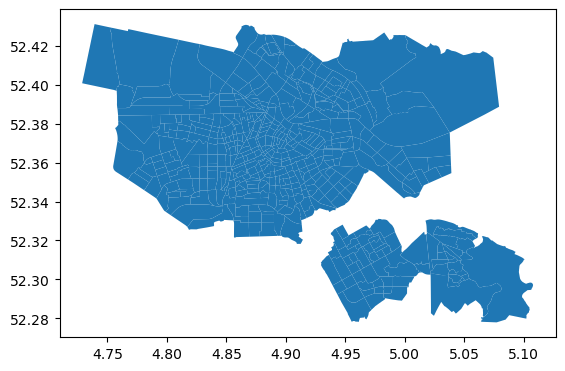

In [67]:
gdf = gpd.read_file('../data/raw_data/ams/geojson_lnglat.json')
gdf.plot()

In [64]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
bbox_gdf = gdf.total_bounds
print(bbox_gdf)

[ 4.728768 52.277978  5.107695 52.431066]


In [41]:
from shapely.geometry import box
b = [box(bbox[0],bbox[1],bbox[2],bbox[3])]
polygon = gpd.GeoDataFrame(geometry=b, crs=4326).buffer(0)

In [19]:
import matplotlib.pyplot as plt

<Axes: >

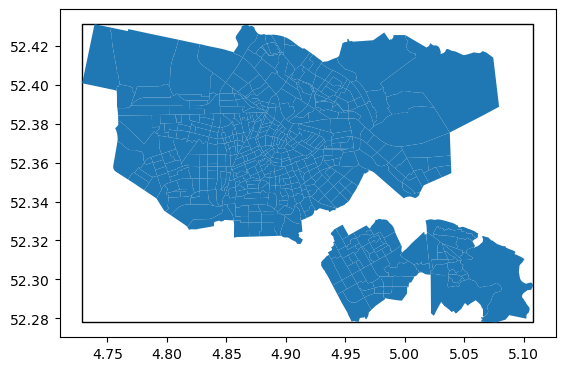

In [42]:
base = polygon.plot(facecolor='none')
gdf.plot(ax=base)


<Axes: >

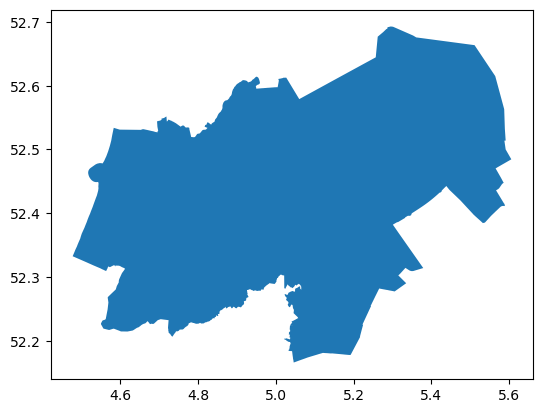

In [87]:
place = "Metropolitan Region Amsterdam"
gdf2 = ox.geocoder.geocode_to_gdf(place)
gdf2.plot()

In [2]:
G1 = ox.graph_from_place("Boston, MA", network_type='walk')

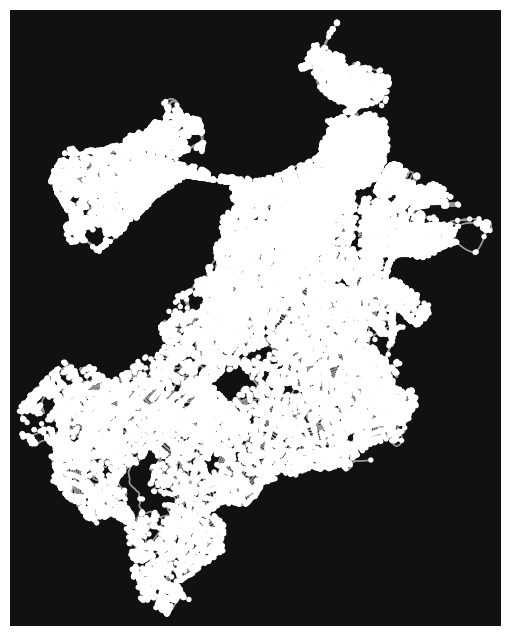

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
ox.plot_graph(G1)

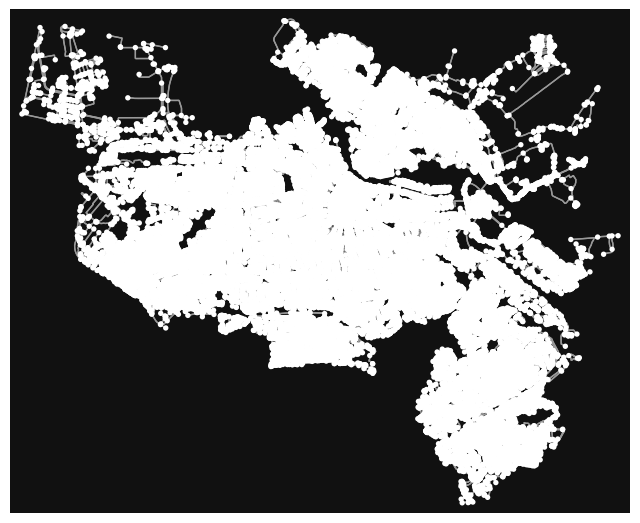

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [86]:
import osmnx as ox
import networkx as nx

def combine_graphs(base_graph, *additional_graphs):
    """
    Combines multiple OSMnx graph objects into a base graph.
    
    Parameters:
    - base_graph: The main graph (OSMnx MultiDiGraph) to which other graphs will be added.
    - additional_graphs: One or more OSMnx MultiDiGraph objects to add to the base graph.
    
    Returns:
    - base_graph: The combined graph with nodes and edges from all input graphs.
    """
    # Iterate through each additional graph
    for graph in additional_graphs:
        # Add nodes from the additional graph to the base graph
        for node, node_data in graph.nodes(data=True):
            if node not in base_graph:
                base_graph.add_node(node, **node_data)
        
        # Add edges from the additional graph to the base graph
        for u, v, key, edge_data in graph.edges(keys=True, data=True):
            if not base_graph.has_edge(u, v, key):
                base_graph.add_edge(u, v, key=key, **edge_data)
    
    return base_graph

# Example usage:
G1 = ox.graph_from_place("Amsterdam", network_type='walk')
G2 = ox.graph_from_place("Zuidoost,Amsterdam", network_type='walk')
G3 = ox.graph_from_place("Diemen,Amsterdam", network_type='walk')

# Combine G2 and G3 into G1
combined_graph = combine_graphs(G1, G2, G3)

# Plot the combined graph
ox.plot_graph(combined_graph)

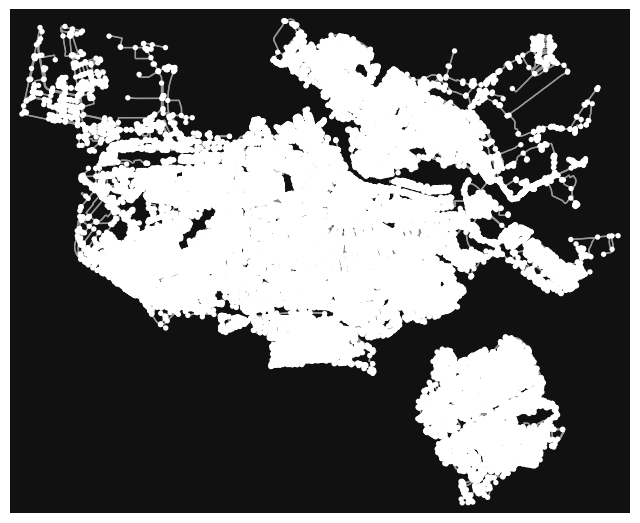

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [80]:
ox.plot_graph(G1)

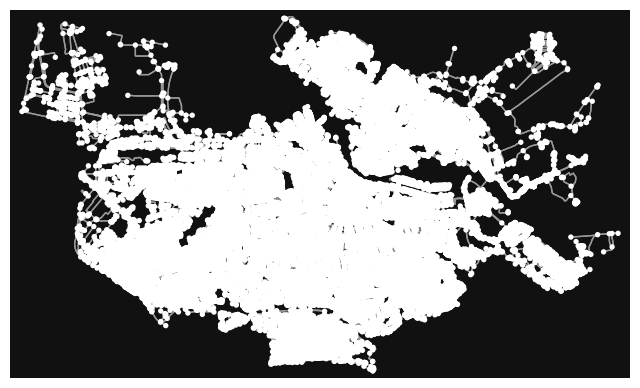

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [84]:
ox.plot_graph(G3)

In [12]:
gdf = gdf.to_crs(28992)

In [5]:
print(bbox)

(4.728768, 52.277978, 5.107695, 52.431066)


In [6]:

g = ox.graph_from_bbox(bbox=bbox, network_type='walk')

/opt/anaconda3/envs/throwing_shade/lib/python3.12/site-packages/osmnx/_overpass.py:254: UserWarning: This area is 9,458 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


KeyboardInterrupt: 